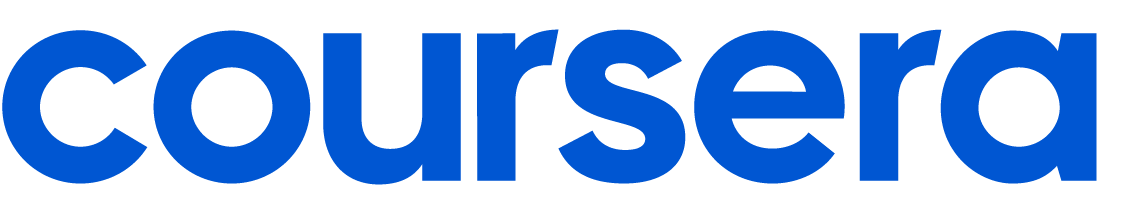

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
# Checking the data types and missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          109435 non-null  object 
 1   Age             109435 non-null  int64  
 2   Income          109435 non-null  int64  
 3   LoanAmount      109435 non-null  int64  
 4   CreditScore     109435 non-null  int64  
 5   MonthsEmployed  109435 non-null  int64  
 6   NumCreditLines  109435 non-null  int64  
 7   InterestRate    109435 non-null  float64
 8   LoanTerm        109435 non-null  int64  
 9   DTIRatio        109435 non-null  float64
 10  Education       109435 non-null  object 
 11  EmploymentType  109435 non-null  object 
 12  MaritalStatus   109435 non-null  object 
 13  HasMortgage     109435 non-null  object 
 14  HasDependents   109435 non-null  object 
 15  LoanPurpose     109435 non-null  object 
 16  HasCoSigner     109435 non-null  object 
dtypes: float64

In [8]:
#Basics Statistics
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [9]:
#Exploring Dataset
train_df["Default"].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

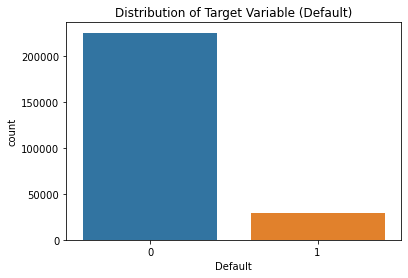

In [10]:
# Distribution of the target variable (Default)
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=train_df)
plt.title('Distribution of Target Variable (Default)')
plt.show()

### Observations from Default Value Counts

0 (Non-Default) accounts for 225,694 instances.

1 (Default) accounts for 29,653 instances.

This means that around 88.4% of the data represents Non-Default cases (0), while only 11.6% represents Default cases (1). 
This is a classic case of an imbalanced dataset, which can cause a predictive model to be biased towards predicting the majority class (0 - Non-Default).

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

In [11]:
# Checking for missing values
missing_values_train = train_df.isnull().sum().sort_values(ascending=False)
missing_values_test = test_df.isnull().sum().sort_values(ascending=False)

# Display features with missing values
print('Missing Values in Train Data:\n', missing_values_train[missing_values_train > 0])
print('\nMissing Values in Test Data:\n', missing_values_test[missing_values_test > 0])

Missing Values in Train Data:
 Series([], dtype: int64)

Missing Values in Test Data:
 Series([], dtype: int64)


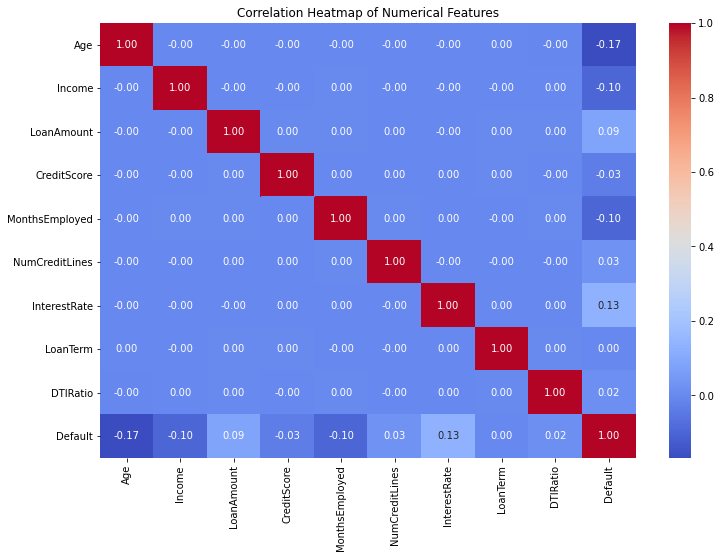

In [12]:
# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

# Assuming `train_df` and `test_df` are already loaded

# Separate features (X) and target (y)
X = train_df.drop(['LoanID', 'Default'], axis=1)  # Features
y = train_df['Default']  # Target

# Print shapes to ensure data is loaded correctly
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Print column names to verify correct selection
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_cols)  # One-Hot Encode categorical features
    ])

# Apply the preprocessor to training, validation, and test data
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
X_test_scaled = preprocessor.transform(test_df.drop(['LoanID'], axis=1))

# Print shapes to ensure correct scaling
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled validation data shape: {X_val_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

# Initialize base models with class_weight parameter to handle imbalance
log_clf = LogisticRegression(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create an ensemble VotingClassifier with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rf_clf),
        ('gb', gb_clf)
    ],
    voting='soft'  # Use soft voting for probability prediction
)

# Train the VotingClassifier on the scaled training data
voting_clf.fit(X_train_scaled, y_train)

# Predict probabilities on the validation data and test data
val_predicted_probability = voting_clf.predict_proba(X_val_scaled)[:, 1]
predicted_probability = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using ROC AUC Score on the validation set
roc_auc = roc_auc_score(y_val, val_predicted_probability)
print(f"Validation ROC AUC Score (Voting Classifier): {roc_auc:.4f}")

# Prepare the prediction DataFrame as required for submission
prediction_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'predicted_probability': predicted_probability
})

# Print DataFrame shape and first few rows
print(f"Prediction DataFrame shape: {prediction_df.shape}")
print(prediction_df.head(10))

# Save to CSV for submission
#prediction_df.to_csv("prediction_submission.csv", index=False)


Features shape: (255347, 16)
Target shape: (255347,)
Categorical columns: Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')
Numerical columns: Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'],
      dtype='object')
Scaled training data shape: (204277, 31)
Scaled validation data shape: (51070, 31)
Scaled test data shape: (109435, 31)
Validation ROC AUC Score (Voting Classifier): 0.7577
Prediction DataFrame shape: (109435, 2)
       LoanID  predicted_probability
0  7RYZGMKJIR               0.149953
1  JDL5RH07AM               0.073353
2  STAL716Y79               0.106886
3  SO0KKJ3IQB               0.313643
4  T99CWTYDCP               0.267615
5  0SNHFWV4UP               0.197825
6  S6ITP6LGYS               0.130607
7  A6I7U12IRJ               0.163726
8  8W6KY50JU4               0.167713
9  THFQ08OLMU     

In [22]:
# Predict probabilities on the test data using the trained VotingClassifier
predicted_probability = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Prepare the prediction DataFrame as required for submission
prediction_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'predicted_probability': predicted_probability
})

# View the 'prediction_df' dataframe as required for submission.
print(prediction_df.shape)
prediction_df.head(10)

# Save to CSV for submission
#prediction_df.to_csv("prediction_submission.csv", index=False)


(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.149953
1,JDL5RH07AM,0.073353
2,STAL716Y79,0.106886
3,SO0KKJ3IQB,0.313643
4,T99CWTYDCP,0.267615
5,0SNHFWV4UP,0.197825
6,S6ITP6LGYS,0.130607
7,A6I7U12IRJ,0.163726
8,8W6KY50JU4,0.167713
9,THFQ08OLMU,0.201219


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [23]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [24]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [25]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [26]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [27]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to CSV for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)

# Load the CSV to verify the submission
submission = pd.read_csv("prediction_submission.csv")

# Ensure it's a DataFrame
assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

# Check column names
assert submission.columns[0] == 'LoanID', 'The first column name should be LoanID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

# Check the shape of the DataFrame
assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'
assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!